## Importing the Transformed Data 

In [1]:
# import libraries
from datetime import datetime, timedelta
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from __future__ import division

In [2]:
data = pd.read_csv('TransformedDataset/transformed_user_summary_ltv.csv')

In [3]:
data.head()

,msno,Monetary,Recency,Frequency,is_auto_renew,lastMonthLTV
0,99,1788,43,410,0,1200
1,193,99,416,30,1,99
2,209,5382,479,990,1,129
3,236,3078,466,660,1,248
4,343,180,52,30,1,180


In [4]:
data.isna().sum()

msno             0
Monetary         0
Recency          0
Frequency        0
is_auto_renew    0
lastMonthLTV     0
dtype: int64

## Creating Cluster Columns for RFM Values 

### Recency Clustering 

In [5]:
#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(data[['Recency']])
data['RecencyCluster'] = kmeans.predict(data[['Recency']])

data = order_cluster('RecencyCluster', 'Recency',data,False)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [7]:
data.head()

,msno,Monetary,Recency,Frequency,is_auto_renew,lastMonthLTV,RecencyCluster
0,99,1788,43,410,0,1200,3
1,343,180,52,30,1,180,3
2,390,180,34,30,1,180,3
3,684,99,58,30,1,99,3
4,799,129,40,30,1,129,3


In [8]:
data['RecencyCluster'].value_counts()

3    7756
0    2984
1     982
2     325
Name: RecencyCluster, dtype: int64

In [9]:
data.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,2984.0,476.458445,15.735183,444.0,469.0,474.0,481.0,789.0
1,982.0,408.904277,21.324420,298.0,406.0,412.0,420.0,441.0
2,325.0,181.729231,41.182677,114.0,154.0,183.0,198.0,294.0
3,7756.0,45.358174,10.930594,33.0,37.0,43.0,51.0,113.0


### Subscription Frequency Clustering

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(data[['Frequency']])
data['FrequencyCluster'] = kmeans.predict(data[['Frequency']])

data = order_cluster('FrequencyCluster', 'Frequency',data,True)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
data.head()

,msno,Monetary,Recency,Frequency,is_auto_renew,lastMonthLTV,RecencyCluster,FrequencyCluster
0,99,1788,43,410,0,1200,3,2
1,25895,2408,49,570,1,100,3,2
2,26836,2384,54,481,1,99,3,2
3,29847,2533,57,590,1,149,3,2
4,34289,1287,39,390,1,99,3,2


In [12]:
data['FrequencyCluster'].value_counts()

0    7658
1    2505
2    1517
3     367
Name: FrequencyCluster, dtype: int64

In [13]:
data.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,7658.0,42.180204,21.197989,0.0,30.0,30.0,60.0,100.0
1,2505.0,182.975250,58.052693,120.0,120.0,180.0,210.0,301.0
2,1517.0,445.500330,87.732335,315.0,390.0,415.0,510.0,650.0
3,367.0,858.762943,164.967760,660.0,720.0,840.0,990.0,1710.0


### Monetary Clustering

In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(data[['Monetary']])
data['MonetaryCluster'] = kmeans.predict(data[['Monetary']])

data = order_cluster('MonetaryCluster', 'Monetary',data,True)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
data.head()

,msno,Monetary,Recency,Frequency,is_auto_renew,lastMonthLTV,RecencyCluster,FrequencyCluster,MonetaryCluster
0,99,1788,43,410,0,1200,3,2,1
1,34289,1287,39,390,1,99,3,2,1
2,36143,1937,46,390,1,149,3,2,1
3,36214,1767,41,390,1,99,3,2,1
4,42792,1937,39,470,1,149,3,2,1


In [16]:
data['MonetaryCluster'].value_counts()

0    9050
1    2071
2     707
3     219
Name: MonetaryCluster, dtype: int64

In [17]:
data.groupby('MonetaryCluster')['Monetary'].describe()

,count,mean,std,min,25%,50%,75%,max
MonetaryCluster,,,,,,,,
0,9050.0,253.593039,175.833657,0.0,149.0,180.0,298.0,814.0
1,2071.0,1394.828585,390.410171,833.0,1032.0,1390.0,1788.0,2115.0
2,707.0,2859.318246,411.144494,2134.0,2538.5,2950.0,2989.0,3852.0
3,219.0,4877.269406,657.057812,3872.0,4453.5,4916.0,5215.0,8520.0


### Last Month LTV Clustering

In [18]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(data[['lastMonthLTV']])
data['LastMonthLTVCluster'] = kmeans.predict(data[['lastMonthLTV']])

data = order_cluster('LastMonthLTVCluster', 'lastMonthLTV',data,True)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
data.head()

,msno,Monetary,Recency,Frequency,is_auto_renew,lastMonthLTV,RecencyCluster,FrequencyCluster,MonetaryCluster,LastMonthLTVCluster
0,99,1788,43,410,0,1200,3,2,1,1
1,456722,1341,56,315,0,1200,3,2,1,1
2,29895,1788,371,410,0,1200,1,2,1,1
3,37078,1788,406,410,0,1200,1,2,1,1
4,76194,1599,393,395,0,1200,1,2,1,1


In [20]:
data['lastMonthLTV'].value_counts()

149     4506
99      3431
129     1535
180     1143
100      325
        ... 
140        1
596        1
1192       1
626        1
1890       1
Name: lastMonthLTV, Length: 84, dtype: int64

In [35]:
data['LastMonthLTVCluster'].value_counts()

0    11464
1      330
2      253
Name: LastMonthLTVCluster, dtype: int64

In [37]:
data.groupby('LastMonthLTVCluster')['lastMonthLTV'].describe()

,count,mean,std,min,25%,50%,75%,max
LastMonthLTVCluster,,,,,,,,
0,3836.0,94.916058,39.712799,-720.0,99.0,99.0,99.0,100.0
1,7634.0,159.988997,49.191854,129.0,149.0,149.0,149.0,500.0
2,577.0,1308.776430,573.981408,536.0,894.0,1200.0,1788.0,2698.0


## Calculating the Overall Score and Creating Segment Column

### Overall Score 

In [22]:
data['OverallScore'] = data['FrequencyCluster']+data['RecencyCluster']+data['MonetaryCluster']

In [23]:
data.head()

,msno,Monetary,Recency,Frequency,is_auto_renew,lastMonthLTV,RecencyCluster,FrequencyCluster,MonetaryCluster,LastMonthLTVCluster,OverallScore
0,99,1788,43,410,0,1200,3,2,1,1,6
1,456722,1341,56,315,0,1200,3,2,1,1,6
2,29895,1788,371,410,0,1200,1,2,1,1,4
3,37078,1788,406,410,0,1200,1,2,1,1,4
4,76194,1599,393,395,0,1200,1,2,1,1,4


In [24]:
data['OverallScore'].value_counts()

3    7130
4    1695
0     851
1     698
2     695
5     533
6     375
7      56
8       9
9       5
Name: OverallScore, dtype: int64

### LTV Segment

In [38]:
data['LTV_Segment'] = 'Low-LTV'
data.loc[data['LastMonthLTVCluster']==1,'LTV_Segment'] = 'Mid-LTV' 
data.loc[data['LastMonthLTVCluster']==2,'LTV_Segment'] = 'High-LTV' 

In [39]:
data['LTV_Segment'].value_counts()

Mid-LTV     7634
Low-LTV     3836
High-LTV     577
Name: LTV_Segment, dtype: int64

In [40]:
data.head()

,msno,Monetary,Recency,Frequency,is_auto_renew,lastMonthLTV,RecencyCluster,FrequencyCluster,MonetaryCluster,LastMonthLTVCluster,OverallScore,LTV_Segment
0,99,1788,43,410,0,1200,3,2,1,2,6,High-LTV
1,456722,1341,56,315,0,1200,3,2,1,2,6,High-LTV
2,29895,1788,371,410,0,1200,1,2,1,2,4,High-LTV
3,37078,1788,406,410,0,1200,1,2,1,2,4,High-LTV
4,76194,1599,393,395,0,1200,1,2,1,2,4,High-LTV


### Label Encoding and Test Train Split 

In [41]:
data = data.drop(['lastMonthLTV','LastMonthLTVCluster','RecencyCluster','FrequencyCluster','MonetaryCluster'],axis=1)

In [42]:
cols = data.columns

In [43]:
objList = data.select_dtypes(include = "object").columns #
print (objList)

Index(['LTV_Segment'], dtype='object')


In [44]:
from sklearn.preprocessing import LabelEncoder #encoder package of sklearn
le = LabelEncoder() #le variable has been assigned a labelencoder function

for Shiv in objList:
    data[Shiv] = le.fit_transform(data[Shiv].astype(str))

print (data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12047 entries, 0 to 12046
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   msno           12047 non-null  int64
 1   Monetary       12047 non-null  int64
 2   Recency        12047 non-null  int64
 3   Frequency      12047 non-null  int64
 4   is_auto_renew  12047 non-null  int64
 5   OverallScore   12047 non-null  int64
 6   LTV_Segment    12047 non-null  int32
dtypes: int32(1), int64(6)
memory usage: 705.9 KB
None


In [73]:
from  sklearn.model_selection  import  train_test_split 
X = data.drop('LTV_Segment',axis=1)
X = X.drop(['msno','is_auto_renew'],axis=1)
y= data['LTV_Segment']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

### KNN Classifier 

In [75]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train,y_train) #training data and  has been provided to the algorithm

knn.score(X_train,y_train)#the data we are passing will be considered for the accuracy


print("Accuracy on training set: {:.2f}".format(knn.score(X_train, y_train)*100))

print("Accuracy on testing set: {:.2f}".format(knn.score(X_test, y_test)*100))

Accuracy on training set: 87.82
Accuracy on testing set: 82.20


In [110]:
y_pred = knn.predict(X_test)

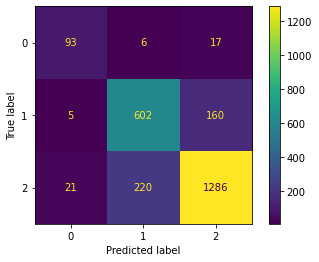

In [111]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

In [112]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average='weighted')

0.8259594302036195

In [113]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='weighted')

0.8219917012448132

In [114]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

0.8233676306514383

### Decision Tree Classifier 

In [76]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="entropy",max_depth=9)
#tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))

print("Accuracy on testing set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.838
Accuracy on testing set: 0.822


In [68]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

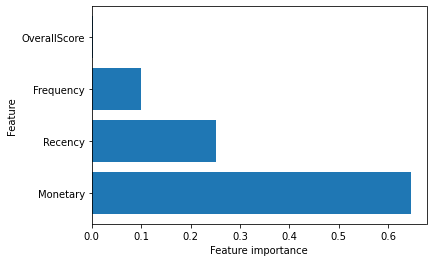

In [115]:
plot_feature_importances(tree)

In [116]:
y_pred = tree.predict(X_test)

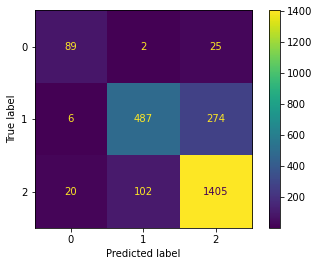

In [117]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

In [118]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average='weighted')

0.8219339321329634

In [119]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='weighted')

0.8219917012448132

In [120]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

0.8164038166509825

### Random Forest Classifier 

In [77]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, max_depth=7)

forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))

print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.853
Accuracy on test set: 0.839


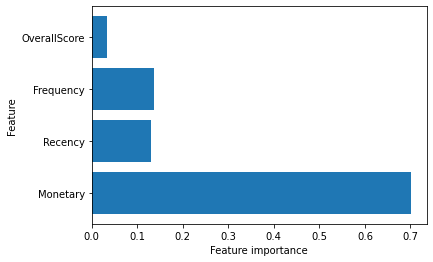

In [121]:
plot_feature_importances(forest)

In [122]:
y_pred = forest.predict(X_test)

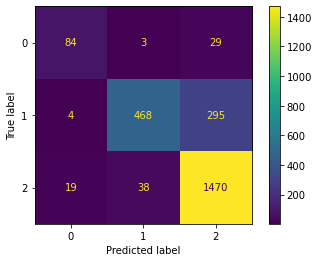

In [123]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

In [124]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average='weighted')

0.8495868178435225

In [125]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='weighted')

0.8390041493775934

In [126]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

0.8306360215493687

### Gradient Boosting Classifier 

In [81]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(learning_rate=0.1,max_depth=7)

gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))

print("GBRT Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.918
GBRT Accuracy on test set: 0.853


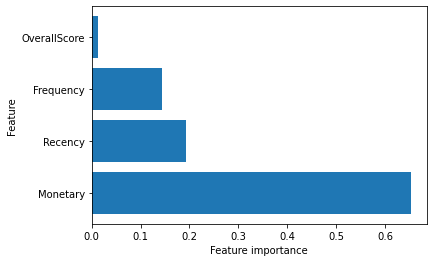

In [127]:
plot_feature_importances(gbrt)

In [128]:
y_pred = gbrt.predict(X_test)

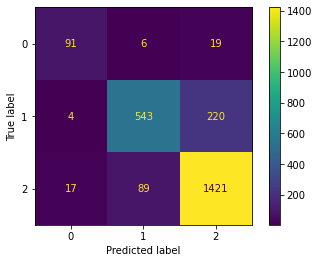

In [129]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

In [130]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average='weighted')

0.8523611332908214

In [131]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='weighted')

0.8526970954356846

In [132]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

0.8494401591373182

### XG Boost Classifier

In [79]:
import xgboost as xgb
xgclf= xgb.XGBClassifier(learning_rate=0.1)
xgclf.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(xgclf.score(X_train, y_train)))

print("Accuracy on test set: {:.3f}".format(xgclf.score(X_test, y_test)))

Accuracy on training set: 0.881
Accuracy on test set: 0.854


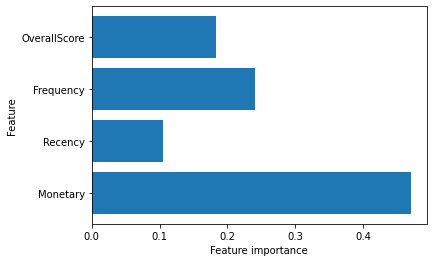

In [133]:
plot_feature_importances(xgclf)

In [134]:
y_pred = xgclf.predict(X_test)

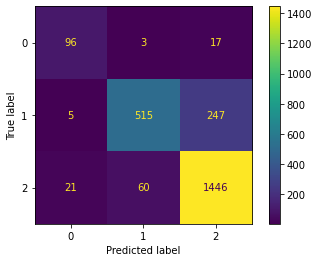

In [135]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

In [136]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average='weighted')

0.8572327693289528

In [137]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='weighted')

0.8535269709543568

In [138]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

0.8486306833762173

### Exporting Results 

In [149]:
dataToPredict = data

In [150]:
dataToPredict.head()

,msno,Monetary,Recency,Frequency,is_auto_renew,OverallScore,LTV_Segment
0,99,1788,43,410,0,6,0
1,456722,1341,56,315,0,6,0
2,29895,1788,371,410,0,4,0
3,37078,1788,406,410,0,4,0
4,76194,1599,393,395,0,4,0


In [151]:
dataToPredict['LTV_Segment'].value_counts()

2    7634
1    3836
0     577
Name: LTV_Segment, dtype: int64

In [152]:
result = pd.DataFrame()

In [153]:
result['msno']=dataToPredict['msno']

In [154]:
dataToPredict = dataToPredict.drop(['msno','LTV_Segment','is_auto_renew'],axis=1)

In [155]:
result['LTV'] = gbrt.predict(dataToPredict)

In [167]:
prediction_of_probability = gbrt.predict_proba(dataToPredict)

In [168]:
result['Probability of Low LTV'] = prediction_of_probability[:,2]

In [169]:
result['Probability of Mid LTV'] = prediction_of_probability[:,1]

In [170]:
result['Probability of High LTV'] = prediction_of_probability[:,0]

In [171]:
result.head()

,msno,LTV,Probability of Low LTV,Probability of Mid LTV,Probability of High LTV
0,99,0,0.200486,0.045879,0.753635
1,456722,2,0.712776,0.284312,0.002912
2,29895,0,0.038594,0.015262,0.946145
3,37078,0,0.059551,0.036859,0.903590
4,76194,0,0.025544,0.015269,0.959187


In [172]:
result.shape

(12047, 5)

In [173]:
churn_result = pd.read_csv('ResultDataset/churn_results.csv')

In [174]:
churn_result.shape

(36403, 4)

In [175]:
result_churn_ltv = pd.merge(churn_result, result, on='msno', how='inner')

In [176]:
result_churn_ltv.shape

(495, 8)

In [177]:
result_churn_ltv.to_csv('ResultDataset/result_churn_ltv.csv',index=False)